# Assignment 

An NOAA dataset has been stored in the file `fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates

#import data
data = pd.read_csv('fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

#convert data
data['Data_Value'] = data['Data_Value']*0.1

data.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,2.2
1,USC00208972,2009-04-29,TMIN,5.6
2,USC00200032,2008-05-26,TMAX,27.8
3,USC00205563,2005-11-11,TMAX,13.9
4,USC00200230,2014-02-27,TMAX,-10.6


In [2]:
#create columns with day, month and year
date_index = pd.DatetimeIndex(data['Date'])
data['Day']=date_index.day
data['Month']=date_index.month
data['Year']=date_index.year

#drop Feb 29
indexnames =data[(data['Day']== 29) & (data['Month'] == 2)].index
data.drop(indexnames, inplace=True)

#split database 
linedata = data[(data['Year']!= 2015)]
data2015 = data[(data['Year']== 2015)]

#find past records
data_max = linedata[linedata["Element"]=="TMAX"].groupby(["Month", "Day"])["Data_Value"].max()
data_min = linedata[linedata["Element"]=="TMIN"].groupby(["Month", "Day"])["Data_Value"].min()

#find year records
max2015 = data2015[data2015["Element"]=="TMAX"].groupby(["Month", "Day"])["Data_Value"].max()
min2015 = data2015[data2015["Element"]=="TMIN"].groupby(["Month", "Day"])["Data_Value"].min()

#determine observation window
observation_axis = np.arange('2015-01-01', '2016-01-01', dtype='datetime64[D]')
observation_axis = np.array(list(map(pd.to_datetime, observation_axis)))

# obtain records broken
max_rec_broken = (max2015 > data_max).values
min_rec_broken = (min2015 < data_min).values

Text(0, 0.5, '° Celsius')

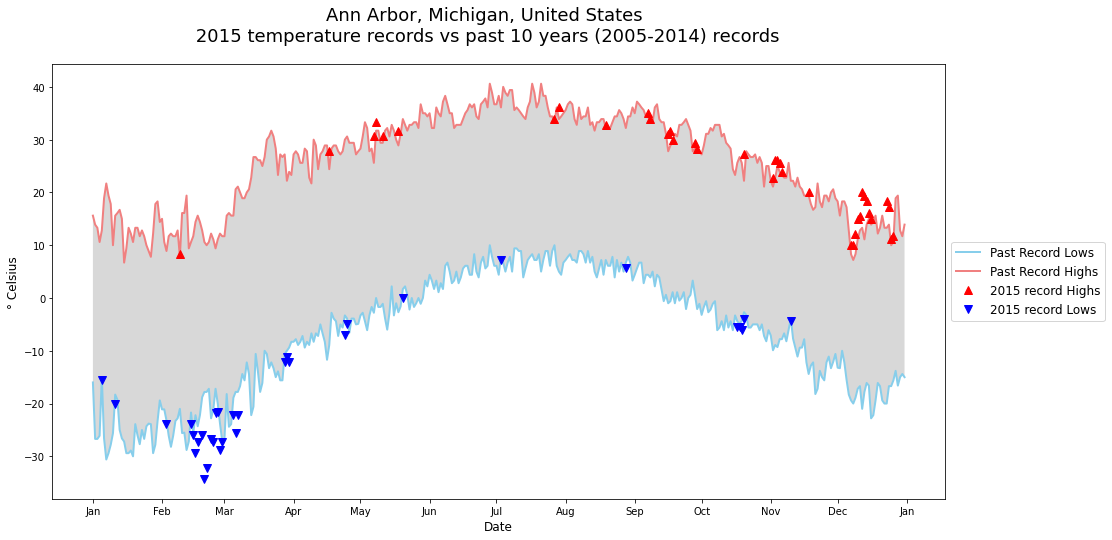

In [5]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16, 8)

#title
plt.suptitle("Ann Arbor, Michigan, United States\n 2015 temperature records vs past 10 years (2005-2014) records", fontsize=18)

#Past record temperatures
plt.plot(observation_axis, data_min.values, '-', color='skyblue', ms=3, alpha=1, linewidth=2) 
plt.plot(observation_axis, data_max.values, '-', color='lightcoral', ms=3, alpha=1, linewidth=2)

#Year records
plt.plot(observation_axis[max_rec_broken], max2015[max_rec_broken].values, 'r^',
         observation_axis[min_rec_broken], min2015[min_rec_broken].values, 'bv', 
         ms=8, alpha=1.0)

#dates in x axis
import matplotlib.dates as mdates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

#legend
plt.legend(['Past Record Lows', 'Past Record Highs', "2015 record Highs", "2015 record Lows"], loc='center left', bbox_to_anchor=(1.0, 0.5), prop={'size':12})

#fill gap in grey
plt.gca().fill_between(observation_axis, data_min, data_max, facecolor='gray', alpha=0.3)

# Set axis names and title:
plt.xlabel('Date', fontsize=12)
plt.ylabel('° Celsius', fontsize=12)